# Galaxies vs quasars with neural networks.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder

C:\Users\loren\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\loren\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("../solutions/galaxyquasar.csv")
data

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


Creating the data arrays for filters and labels.

In [3]:
# filter arrays
u_g = np.array(data['u'] - data['g'])
g_r = np.array(data['g'] - data['r'])
r_i = np.array(data['r'] - data['i'])
i_z = np.array(data['i'] - data['z'])

# labels for galaxies and quasars
lab=np.genfromtxt('../solutions/galaxyquasar.csv', delimiter=',',skip_header=1,usecols=5,dtype=str)
set(lab)

{'GALAXY', 'QSO'}

In [4]:
# arrays for predictions
X = np.array([u_g, g_r, r_i, i_z]).T
y = np.array(lab == 'QSO', dtype=int)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [7]:
y_test

array([0, 0, 1, ..., 1, 0, 1])

In [8]:
X_train.shape

(33500, 4)

**Keras**

In [9]:
from tensorflow import keras
import tensorflow as tf

# setting random seeds in order to have the same result and not overwriting models
keras.backend.clear_session() 
np.random.seed(42) 
tf.random.set_seed(42)

In [10]:
# reshape for CNN
X_train = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

print(len(X_train))
print(X_train.shape)
print(X_test.shape)

33500
(33500, 4, 1)
(16500, 4, 1)


Construction of a model with 1 input layer (with 5 neurons), a ReLU activation function and a learning rate of 0.001

In [11]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Input(shape=(4, 1)))

model.add(Dense(5, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='relu'))

In [12]:
optimizer = Adam(learning_rate=0.001)

In [13]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [14]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4, 5)           │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
clf = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8631 - loss: 0.5605
Epoch 2/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8985 - loss: 0.2363
Epoch 3/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9763 - loss: 0.1667
Epoch 4/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9814 - loss: 0.1569
Epoch 5/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9827 - loss: 0.1529
Epoch 6/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9828 - loss: 0.1501
Epoch 7/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9833 - loss: 0.1502
Epoch 8/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9831 - loss: 0.1516
Epoch 9/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9832 - loss: 0.1481
Epoch 10/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9837 - loss: 0.1447


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9834 - loss: 0.1611


In [17]:
predictions = model.predict(X_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Plotting the ROC curve

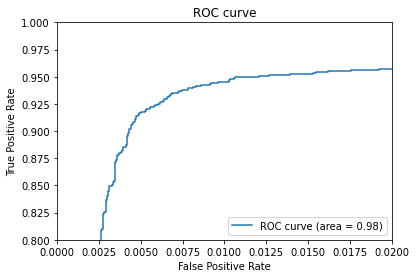

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim(0, 0.02)
plt.ylim(0.8, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Hyperparameter optimization**

I define a function in which i write the searching space of hyperparameters.

In [20]:
def build_model(hp):
    model = Sequential()
    
    model.add(
            Dense(
            # number of units tuning
            units=hp.Int("units", min_value=5, max_value=32, step=1),
            # activation function tuning
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    
    model.add(Flatten())
    
    # dropout tuning
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))
    model.add(Dense(1, activation="relu"))
    
    # optimizer learning rate tuning
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

Here i use the package [*KerasTuner*](https://keras.io/guides/keras_tuner/) to optimize hyperparameters.

In [21]:
import keras_tuner
build_model(keras_tuner.HyperParameters()) 

<Sequential name=sequential_1, built=False>

Since hyperparameters are actual values, i can put them into variables, loops or if conditions.

In [22]:
hp = keras_tuner.HyperParameters()

I then initialize the tuner through the tuning algorithm *RandomSearch* as follows.

In [23]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,        # model building function
    objective="val_accuracy",      # objective to optimize
    max_trials=3,                  # n° of trials during the search
    executions_per_trial=2,        # n° of model built in each trial
    overwrite=True,                # ignoring previous results to a new search
    directory="my_dir",            # directory for storing search results
    project_name="GALvsQSO_Keras", # name of the sub-directory in the directory
)

In [24]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 32, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


I divide the training set into validation and training subsets.

In [25]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

I then start the search for the best hyperparameter configuration.

In [26]:
tuner.search(X_train, y_train, epochs=2, validation_data=(X_val, y_val))

Trial 3 Complete [00h 00m 12s]
val_accuracy: 0.9791044890880585

Best val_accuracy So Far: 0.9849253594875336
Total elapsed time: 00h 00m 35s


I retrieve the best model(s). The model is saved at its best performing epoch on the validation_data.

In [27]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

C:\Users\loren\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4, 16)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
tuner.results_summary()

Results summary
Results in my_dir\GALvsQSO_Keras
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units: 16
activation: relu
dropout: False
lr: 0.009105451871123885
Score: 0.9849253594875336

Trial 1 summary
Hyperparameters:
units: 5
activation: tanh
dropout: True
lr: 0.0028088914826066686
Score: 0.9815671741962433

Trial 2 summary
Hyperparameters:
units: 19
activation: tanh
dropout: True
lr: 0.0003968708072022741
Score: 0.9791044890880585


I now retrain the model with the entire dataset.

In [29]:
# top 2 hyperparameters
best_hps = tuner.get_best_hyperparameters(5)

# best hyperparameter model building
best_model = build_model(best_hps[0])

# fitting the entire dataset
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))
best_model.fit(x=x_all, y=y_all, epochs=10)

Epoch 1/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9752 - loss: 0.1956
Epoch 2/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9793 - loss: 0.1822
Epoch 3/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9531 - loss: 0.6172
Epoch 4/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9823 - loss: 0.1623
Epoch 5/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9820 - loss: 0.1778
Epoch 6/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9744 - loss: 0.2687
Epoch 7/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9796 - loss: 0.1952
Epoch 8/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9809 - loss: 0.1769
Epoch 9/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9819 - loss: 0.1750
Epoch 10/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9810 - loss: 0.1698


In [30]:
best_loss, best_accuracy = best_model.evaluate(X_test, y_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9825 - loss: 0.1705


In [31]:
best_predictions = best_model.predict(X_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Plot of the ROC curve of the best model.

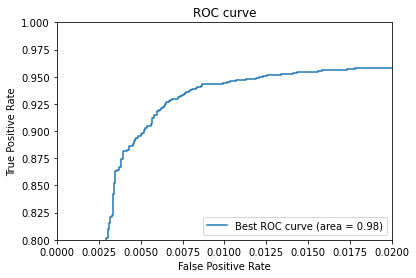

In [32]:
best_fpr, best_tpr, best_thresholds = roc_curve(y_test, best_predictions)
best_roc_auc = auc(best_fpr, best_tpr)

plt.figure()
plt.plot(best_fpr, best_tpr, label=f'Best ROC curve (area = {best_roc_auc:.2f})')
plt.xlim(0, 0.02)
plt.ylim(0.8, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

I can now compare the initial model with the optimized one, through a superposition of the ROC curves.

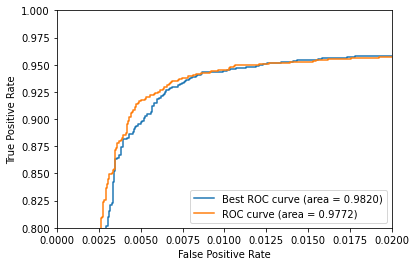

In [34]:
plt.figure()
plt.plot(best_fpr, best_tpr, label=f'Best ROC curve (area = {best_roc_auc:.4f})')
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.xlim(0, 0.02)
plt.ylim(0.8, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

I can see that the optimized model performs slighlty better than the initial one.